In [300]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [301]:
df = pd.read_csv("../data/2023_02_18/apartment_data.csv")
df = df[df["building_year"] < 2023]
df = df[~df["price"].isna()]
df.head()

,code,created_at,updated_at,price,price_per_m2,slides,seller,town_district_name,town_sub_district_name,address,...,parking_place,nearest_metro_station,nearest_metro_station_distance,layout,neighbors,number_of_beds,term_of_sale,owner,ceiling_height,is_new_build
2,1465891,2019-03-21T21:59:54+03:00,2023-01-17T17:02:16+03:00,99544.0,1418.0,['https://www.youtube.com/watch?v=vOCuCTLTsFQ'...,Хозяин,Центральный район,Лебяжий (Ржавец),Минск Ильянская ул. 16,...,False,NaN,NaN,NaN,NaN,NaN,Чистая продажа,частная,2.75,True
5,2967512,2023-02-16T11:16:02+03:00,2023-02-16T17:05:26+03:00,945000.0,3445.0,['https://static.realt.by/user/o6/4/site1q5yb4...,Агентство,Центральный район,"Машерова, Оперный театр, Коммунистическая",Минск Сторожовская ул. 6,...,False,Немига,600.0,NaN,NaN,NaN,Чистая продажа,частная,NaN,False
6,2893621,2022-10-31T13:42:01+03:00,2022-11-17T11:38:24+03:00,82000.0,1224.0,['https://static.realt.by/user/nl/y/site1km4fy...,Хозяин,Советский район,"Я.Коласа-Рига, Некрасова, Восточная",Минск Богдановича ул. 144,...,True,NaN,NaN,улучшенный проект,NaN,NaN,Чистая продажа,частная,2.70,True
7,2955975,2023-02-01T09:06:58+03:00,2023-02-10T05:00:50+03:00,69900.0,1099.0,['https://static.realt.by/user/2n/3/site1pdd03...,Агентство,Октябрьский район,Минск Мир (Minsk World),Минск Аэродромная ул. 26,...,False,Аэродромная (2023),550.0,свободная планировка,NaN,NaN,Чистая продажа,частная,2.73,False
9,2835309,2022-08-18T10:05:51+03:00,2023-01-31T15:40:27+03:00,137000.0,2042.0,['https://static.realt.by/user/6o/q/site1gsu6q...,Агентство,Центральный район,"Червякова, Шевченко",Минск Нововиленская ул. 10,...,False,NaN,NaN,NaN,NaN,NaN,Чистая продажа,частная,2.70,False


In [302]:
df = df[["price", 
"town_district_name", 
"building_year", "area_total", 
"area_living", "area_kitchen", 
"rooms","storeys", "storey",
"toilet", "balcony_type",
"house_type", "floor_type",
"nearest_metro_station",
"ceiling_height"]]

In [303]:
df.head()

,price,town_district_name,building_year,area_total,area_living,area_kitchen,rooms,storeys,storey,toilet,balcony_type,house_type,floor_type,nearest_metro_station,ceiling_height
2,99544.0,Центральный район,2021.0,70.2,61.9,NaN,2,25.0,3.0,Раздельный,лоджия застекленная,Каркасно-блочный,NaN,NaN,2.75
5,945000.0,Центральный район,2012.0,274.3,203.8,18.0,4,23.0,12.0,Раздельный,Нет,Каркасно-блочный,паркет,Немига,NaN
6,82000.0,Советский район,2022.0,67.0,39.0,NaN,2,26.0,11.0,Раздельный,Лоджия,Каркасно-блочный,NaN,NaN,2.70
7,69900.0,Октябрьский район,2022.0,63.6,30.0,NaN,2,29.0,2.0,Совмещенный,Нет,Каркасно-блочный,бетонная стяжка,Аэродромная (2023),2.73
9,137000.0,Центральный район,2007.0,67.1,48.2,NaN,2,10.0,7.0,Совмещенный,лоджия застекленная,Кирпичный,NaN,NaN,2.70


In [304]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9501 entries, 2 to 19355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  9501 non-null   float64
 1   town_district_name     9319 non-null   object 
 2   building_year          9501 non-null   float64
 3   area_total             9501 non-null   float64
 4   area_living            9415 non-null   float64
 5   area_kitchen           6669 non-null   float64
 6   rooms                  9501 non-null   int64  
 7   storeys                9494 non-null   float64
 8   storey                 9492 non-null   float64
 9   toilet                 9005 non-null   object 
 10  balcony_type           9390 non-null   object 
 11  house_type             9489 non-null   object 
 12  floor_type             7408 non-null   object 
 13  nearest_metro_station  6561 non-null   object 
 14  ceiling_height         7709 non-null   float64
dtypes: 

# EDA

## Town district name

In [305]:
df["town_district_name"].unique()

array(['Центральный район', 'Советский район', 'Октябрьский район',
       'Заводской район', 'Первомайский район', 'Фрунзенский район',
       'Московский район', nan, 'Ленинский район', 'Партизанский район'],
      dtype=object)

In [306]:
df["town_district_name"] = df["town_district_name"].fillna(df["town_district_name"].mode().iloc[0])

In [307]:
town_district_mapping = {'Центральный район': 'Tsentralny', 'Октябрьский район': 'Oktyabrsky', 'Первомайский район': 'Pervomaisky',
       'Московский район': 'Moskovsky', 'Фрунзенский район': 'Frunzensky', 'Советский район': 'Sovetsky',
       'Ленинский район': 'Leninsky', 'Заводской район': 'Zavodskoy', 'Партизанский район': 'Partizansky'}

df["town_district_name"] = df["town_district_name"].map(town_district_mapping)

## Building year

In [308]:
df["building_year"].unique()

array([2021., 2012., 2022., 2007., 1982., 2011., 2008., 2016., 2015.,
       1996., 2014., 2004., 1975., 1946., 2010., 1967., 1989., 1971.,
       1972., 1994., 1995., 1969., 2002., 1984., 1956., 1977., 1986.,
       2020., 1955., 1990., 2001., 1978., 2013., 2019., 2003., 1999.,
       2017., 1958., 1985., 1973., 1987., 1980., 2018., 1939., 1976.,
       1966., 1970., 1957., 1962., 1964., 2000., 1965., 1993., 1974.,
       1963., 1981., 1960., 1959., 2009., 1998., 1997., 1953., 1991.,
       2005., 1992., 1954., 1988., 2006., 1968., 1961., 1948., 1950.,
       1983., 1938., 1979., 1947., 1936., 1937., 1930., 1951., 1918.,
       1940., 1949., 1952., 1917., 1928., 1931., 1945., 1941.,    0.,
       1935., 1924., 1932.])

## Total area

<Axes: xlabel='area_total', ylabel='Count'>

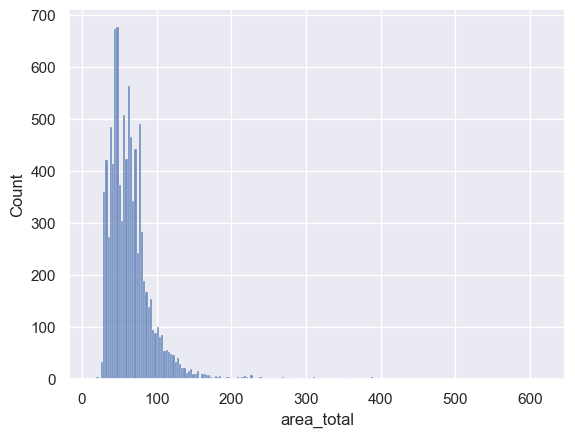

In [309]:
sns.histplot(data=df, x="area_total")

## Living area

<Axes: xlabel='area_living', ylabel='Count'>

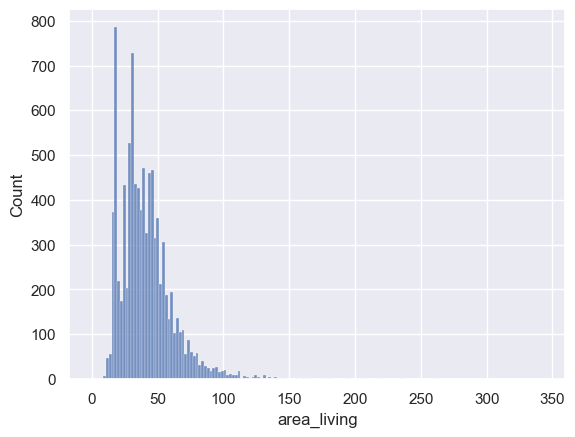

In [310]:
sns.histplot(data=df, x="area_living")

In [311]:
df.assign(
    living_area_percent = df["area_living"]/df["area_total"]
).loc[:, ["living_area_percent", "rooms"]].groupby("rooms").mean()

,living_area_percent
rooms,
1,0.584120
2,0.637554
3,0.663572
4,0.662734
5,0.586216
6,0.454725
7,0.637665
8,0.539676
9,0.570000


In [312]:
df["area_living"] = df["area_living"].fillna(0.58*df["area_total"])

## Kitchen area

In [313]:
len(df[df["area_kitchen"].isna()])

2832

<Axes: xlabel='area_kitchen', ylabel='Count'>

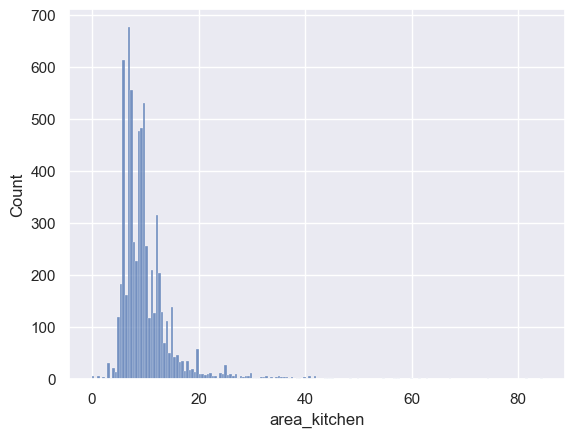

In [314]:
sns.histplot(data=df, x="area_kitchen")

In [315]:
df.assign(
    kitchen_area_percent = df["area_kitchen"]/df["area_total"]
).loc[:, ["kitchen_area_percent", "rooms"]].groupby("rooms").mean()

,kitchen_area_percent
rooms,
1,0.222773
2,0.174196
3,0.137798
4,0.120384
5,0.111048
6,0.101148
7,0.068644
8,0.167013
9,0.072222


In [316]:
df["area_kitchen"] = df["area_kitchen"].fillna(0.16*df["area_total"])

## Rooms

In [317]:
df["rooms"].unique()

array([ 2,  4,  1,  3,  6,  5, 10,  7,  8,  9], dtype=int64)

In [318]:
df["rooms"].value_counts()

3     3287
2     3041
1     2064
4      956
5      110
6       35
7        5
10       1
8        1
9        1
Name: rooms, dtype: int64

<Axes: xlabel='rooms', ylabel='count'>

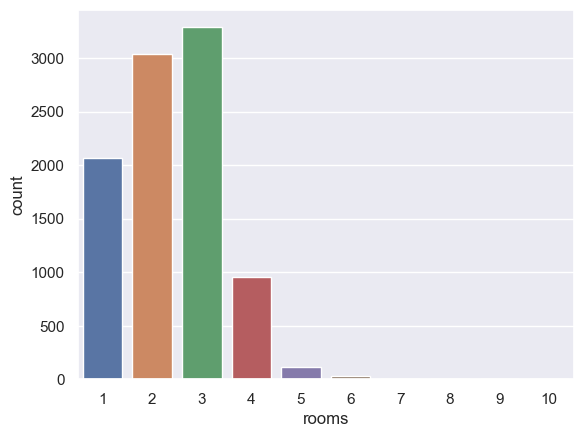

In [319]:
sns.countplot(x=df["rooms"])

## Storeys                         

In [320]:
df["storeys"].unique()

array([25., 23., 26., 29., 10.,  9.,  5., 15., 14., 19., 16., 20.,  6.,
        7., 17.,  4., 24., 12.,  8., 13., 18.,  3., 21., 22., 11., 32.,
       nan,  2., 33., 27.,  1., 30., 37., 28.])

In [321]:
df["storeys"] = df["storeys"].fillna(value=1)

## Storey

In [322]:
df["storey"].unique()

array([ 3., 12., 11.,  2.,  7.,  6.,  5., 13.,  8., 19., 16.,  4.,  1.,
        9., 10., 14., 15., 24., 23., 18., 17., 22., 21., 20., 26., 25.,
       nan, 27., 32., 28., 30., 42.])

In [323]:
df["storey"] = df["storey"].fillna(value=1)

## Toilet

In [324]:
df["toilet"].unique()

array(['Раздельный', 'Совмещенный', '2 и более', nan, '3 сан.узла',
       '4 сан.узла'], dtype=object)

In [325]:
df["toilet"].value_counts()

Раздельный     4322
Совмещенный    3517
2 и более      1101
3 сан.узла       52
4 сан.узла       13
Name: toilet, dtype: int64

In [326]:
def process_toilet_feature(x):
    if x in ["Раздельный", "Совмещенный", "2 и более"]:
        return x
    elif x in ["3 сан. узла", "4 сан. узла"]:
        return "2 и более"

In [327]:
df["toilet"] = (
    df["toilet"]
    .apply(process_toilet_feature)
    .fillna(df["toilet"].mode()[0])
)

In [328]:
toilet_mapping = {"Раздельный": "Separate", "Совмещенный": "Combined", "2 и более": "2 and more"}
df["toilet"] = df["toilet"].map(toilet_mapping)

## Balcony type                    

In [329]:
df["balcony_type"].unique()

array(['лоджия застекленная', 'Нет', 'Лоджия', 'балкон+терраса',
       '2 лоджии застекленные', '2 лоджии', 'балкон застекленный',
       'балкон', 'лоджия из кухни застеклена', '2 балкона застекленные',
       'балкон застекленный + вагонка', 'терраса', 'балкон и лоджия', nan,
       '3 лоджии застекленные', '3 лоджии',
       '2 балкона застекленные + вагонка', '2 балкона',
       'лоджия застекленная + вагонка', '3 балкона застекленных',
       '2 лоджии 1 застекленная', 'лоджия из кухни застеклена + вагонка',
       '2 балкона 1 застекленный', '2 лоджии застекленные + вагонка',
       'лоджия из кухни', '3 балкона', 'веранда'], dtype=object)

In [330]:
df["balcony_type"].value_counts()

лоджия застекленная                     4321
Лоджия                                  1085
балкон застекленный                      860
Нет                                      731
балкон                                   695
2 лоджии застекленные                    567
2 лоджии                                 191
балкон и лоджия                          173
терраса                                  166
2 балкона                                102
2 балкона застекленные                    83
лоджия из кухни застеклена                70
лоджия застекленная + вагонка             60
балкон+терраса                            55
2 лоджии 1 застекленная                   42
3 лоджии застекленные                     41
3 лоджии                                  27
балкон застекленный + вагонка             26
2 лоджии застекленные + вагонка           22
лоджия из кухни                           19
3 балкона                                 17
3 балкона застекленных                    11
2 балкона 

In [331]:
def map_balcony(x):
    loggias = ["лоджия застекленная", "лоджия", "лоджия из кухни застеклена",
           "лоджия из кухни", "лоджия из кухни застеклена + вагонка", "балкон и лоджия"]
    balconies = ["балкон застекленный", "балкон", "балкон застекленный + вагонка"]
    two_balconies = ["2 лоджии застекленные", "2 лоджии", "2 балкона", "2 балкона застекленные", 
                     "балкон+терраса", "3 лоджии застекленные", "балкон+терраса", 
                     "2 лоджии застекленные + вагонка", "3 лоджии", "3 балкона", "2 балкона застекленные + вагонка",
                     "2 лоджии 1 застекленная", "3 балкона застекленных", "2 балкона 1 застекленный"]

    if x == 'Нет':
        return 'Нет'
    elif x in loggias:
        return 'Лоджия'
    elif x in balconies:
        return 'Балкон'
    elif x in two_balconies:
        return 'Два балкона'
    else:
        return 'Балкон'

In [332]:
df["balcony_type"] = (
    df["balcony_type"]
    .fillna(df["balcony_type"].mode()[0])
    .map(map_balcony)
)

In [333]:
balcony_type_mapping = {"Нет": "Without", "Лоджия": "Loggia", "Балкон": "Balcony", "Два балкона": "Two balconies"}
df["balcony_type"] = df["balcony_type"].map(balcony_type_mapping)

## House type                      

In [334]:
df["house_type"].unique()

array(['Каркасно-блочный', 'Кирпичный', 'Панельный', 'Монолитный',
       'Силикатные блоки', 'Блок-комнаты', 'Бревенчатый', nan],
      dtype=object)

In [335]:
df["house_type"].value_counts()

Каркасно-блочный    4171
Панельный           2636
Кирпичный           1686
Монолитный           552
Блок-комнаты         227
Силикатные блоки     195
Бревенчатый           22
Name: house_type, dtype: int64

In [336]:
df["house_type"] = df["house_type"].fillna(df["house_type"].mode()[0]) 

In [337]:
df = df[df["house_type"] != "Бревенчатый"]

In [338]:
house_type_mapping = {'Каркасно-блочный': 'frame-block', 'Панельный': 'panel', 'Кирпичный': 'brick',
                  'Монолитный': 'monolithic', 'Блок-комнаты': 'block-rooms', 'Силикатные блоки': 'silicate'}
df["house_type"] = df["house_type"].map(house_type_mapping)

## Near the metro station

In [339]:
df["near_the_metro_station"] = df['nearest_metro_station'].apply(lambda x: 'Yes' if x is not np.nan else 'No')

## Ceiling height                  

In [340]:
df["ceiling_height"]

2        2.75
5         NaN
6        2.70
7        2.73
9        2.70
         ... 
19344    3.20
19348    2.76
19351    2.70
19352     NaN
19355     NaN
Name: ceiling_height, Length: 9479, dtype: float64

In [341]:
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].mode()[0])

<Axes: xlabel='ceiling_height', ylabel='Count'>

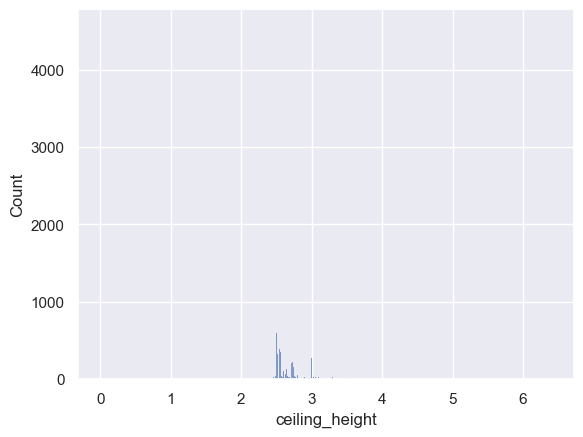

In [342]:
sns.histplot(data=df, x="ceiling_height")

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9479 entries, 2 to 19355
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   9479 non-null   float64
 1   town_district_name      9479 non-null   object 
 2   building_year           9479 non-null   float64
 3   area_total              9479 non-null   float64
 4   area_living             9479 non-null   float64
 5   area_kitchen            9479 non-null   float64
 6   rooms                   9479 non-null   int64  
 7   storeys                 9479 non-null   float64
 8   storey                  9479 non-null   float64
 9   toilet                  9479 non-null   object 
 10  balcony_type            9479 non-null   object 
 11  house_type              9479 non-null   object 
 12  floor_type              7391 non-null   object 
 13  nearest_metro_station   6554 non-null   object 
 14  ceiling_height          9479 non-null  

In [344]:
df[["price", 
"town_district_name", 
"building_year", "area_total",
"area_living", "area_kitchen",
"rooms","storeys", "storey",
"toilet", "balcony_type",
"house_type",
"near_the_metro_station",
"ceiling_height"]].to_csv("../data/2023_02_18/cleaned_data.csv", index=False)